<a href="https://colab.research.google.com/github/rodayna-moamen/fraud_detection_project/blob/main/notebook/notebook1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files

print("upload training files:")
uploaded = files.upload()

print("\nFiles uploaded successfully!")

upload training files:


Saving Train_Outpatientdata-1542865627584.csv to Train_Outpatientdata-1542865627584 (1).csv
Saving Train_Beneficiarydata-1542865627584.csv to Train_Beneficiarydata-1542865627584 (1).csv
Saving Train_Inpatientdata-1542865627584.csv to Train_Inpatientdata-1542865627584 (1).csv
Saving Train-1542865627584.csv to Train-1542865627584.csv

Files uploaded successfully!


In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

print("Libraries imported successfully!")

Libraries imported successfully!


In [ ]:
# Load TRAINING data
beneficiary = pd.read_csv('Train_Beneficiarydata-1542865627584.csv')
inpatient = pd.read_csv('Train_Inpatientdata-1542865627584.csv')
outpatient = pd.read_csv('Train_Outpatientdata-1542865627584.csv')
labels = pd.read_csv('Train-1542865627584.csv')

print("=" * 60)
print("DATA LOADED")
print("=" * 60)
print(f"\nBeneficiary: {beneficiary.shape}")
print(f"Inpatient: {inpatient.shape}")
print(f"Outpatient: {outpatient.shape}")
print(f"Labels: {labels.shape}")

print("\n✓ All training data loaded!")

DATA LOADED

Beneficiary: (138556, 25)
Inpatient: (40474, 30)
Outpatient: (517737, 27)
Labels: (5410, 2)

✓ All training data loaded!


In [ ]:
# Look at labels
print("=" * 60)
print("LABELS DATA")
print("=" * 60)
print(labels.head(10))
print(f"\nColumns: {labels.columns.tolist()}")
print(f"\nFraud distribution:")
print(labels['PotentialFraud'].value_counts())

LABELS DATA
   Provider PotentialFraud
0  PRV51001             No
1  PRV51003            Yes
2  PRV51004             No
3  PRV51005            Yes
4  PRV51007             No
5  PRV51008             No
6  PRV51011             No
7  PRV51012             No
8  PRV51013             No
9  PRV51014             No

Columns: ['Provider', 'PotentialFraud']

Fraud distribution:
PotentialFraud
No     4904
Yes     506
Name: count, dtype: int64


In [ ]:
# Look at beneficiary data
print("=" * 60)
print("BENEFICIARY DATA")
print("=" * 60)
print(beneficiary.head())
print(f"\nShape: {beneficiary.shape}")
print(f"Columns: {beneficiary.columns.tolist()}")

BENEFICIARY DATA
      BeneID         DOB  DOD  Gender  Race RenalDiseaseIndicator  State  \
0  BENE11001  1943-01-01  NaN       1     1                     0     39   
1  BENE11002  1936-09-01  NaN       2     1                     0     39   
2  BENE11003  1936-08-01  NaN       1     1                     0     52   
3  BENE11004  1922-07-01  NaN       1     1                     0     39   
4  BENE11005  1935-09-01  NaN       1     1                     0     24   

   County  NoOfMonths_PartACov  NoOfMonths_PartBCov  ChronicCond_Alzheimer  \
0     230                   12                   12                      1   
1     280                   12                   12                      2   
2     590                   12                   12                      1   
3     270                   12                   12                      1   
4     680                   12                   12                      2   

   ChronicCond_Heartfailure  ChronicCond_KidneyDisease  C

In [ ]:
# Look at inpatient data
print("=" * 60)
print("INPATIENT DATA")
print("=" * 60)
print(inpatient.head())
print(f"\nShape: {inpatient.shape}")
print(f"Columns: {inpatient.columns.tolist()}")

INPATIENT DATA
      BeneID   ClaimID ClaimStartDt  ClaimEndDt  Provider  \
0  BENE11001  CLM46614   2009-04-12  2009-04-18  PRV55912   
1  BENE11001  CLM66048   2009-08-31  2009-09-02  PRV55907   
2  BENE11001  CLM68358   2009-09-17  2009-09-20  PRV56046   
3  BENE11011  CLM38412   2009-02-14  2009-02-22  PRV52405   
4  BENE11014  CLM63689   2009-08-13  2009-08-30  PRV56614   

   InscClaimAmtReimbursed AttendingPhysician OperatingPhysician  \
0                   26000          PHY390922                NaN   
1                    5000          PHY318495          PHY318495   
2                    5000          PHY372395                NaN   
3                    5000          PHY369659          PHY392961   
4                   10000          PHY379376          PHY398258   

  OtherPhysician AdmissionDt ClmAdmitDiagnosisCode  DeductibleAmtPaid  \
0            NaN  2009-04-12                  7866             1068.0   
1            NaN  2009-08-31                  6186             1068.0

In [ ]:
# Look at outpatient data
print("=" * 60)
print("OUTPATIENT DATA")
print("=" * 60)
print(outpatient.head())
print(f"\nShape: {outpatient.shape}")
print(f"Columns: {outpatient.columns.tolist()}")

OUTPATIENT DATA
      BeneID    ClaimID ClaimStartDt  ClaimEndDt  Provider  \
0  BENE11002  CLM624349   2009-10-11  2009-10-11  PRV56011   
1  BENE11003  CLM189947   2009-02-12  2009-02-12  PRV57610   
2  BENE11003  CLM438021   2009-06-27  2009-06-27  PRV57595   
3  BENE11004  CLM121801   2009-01-06  2009-01-06  PRV56011   
4  BENE11004  CLM150998   2009-01-22  2009-01-22  PRV56011   

   InscClaimAmtReimbursed AttendingPhysician OperatingPhysician  \
0                      30          PHY326117                NaN   
1                      80          PHY362868                NaN   
2                      10          PHY328821                NaN   
3                      40          PHY334319                NaN   
4                     200          PHY403831                NaN   

  OtherPhysician ClmDiagnosisCode_1 ClmDiagnosisCode_2 ClmDiagnosisCode_3  \
0            NaN              78943              V5866              V1272   
1            NaN               6115                NaN

In [ ]:
print("=" * 60)
print("MISSING VALUES CHECK (BEFORE CLEANING)")
print("=" * 60)

print("\n1. BENEFICIARY:")
missing = beneficiary.isnull().sum()
missing = missing[missing > 0].sort_values(ascending=False)
if len(missing) > 0:
    print(missing)
else:
    print("   No missing values!")

print("\n2. INPATIENT:")
missing = inpatient.isnull().sum()
missing = missing[missing > 0].sort_values(ascending=False)
if len(missing) > 0:
    print(missing)
else:
    print("   No missing values!")

print("\n3. OUTPATIENT:")
missing = outpatient.isnull().sum()
missing = missing[missing > 0].sort_values(ascending=False)
if len(missing) > 0:
    print(missing)
else:
    print("   No missing values!")

MISSING VALUES CHECK (BEFORE CLEANING)

1. BENEFICIARY:
DOD    137135
dtype: int64

2. INPATIENT:
ClmProcedureCode_6     40474
ClmProcedureCode_5     40465
ClmProcedureCode_4     40358
ClmProcedureCode_3     39509
ClmDiagnosisCode_10    36547
OtherPhysician         35784
ClmProcedureCode_2     35020
ClmProcedureCode_1     17326
OperatingPhysician     16644
ClmDiagnosisCode_9     13497
ClmDiagnosisCode_8      9942
ClmDiagnosisCode_7      7258
ClmDiagnosisCode_6      4838
ClmDiagnosisCode_5      2894
ClmDiagnosisCode_4      1534
DeductibleAmtPaid        899
ClmDiagnosisCode_3       676
ClmDiagnosisCode_2       226
AttendingPhysician       112
dtype: int64

3. OUTPATIENT:
ClmProcedureCode_6       517737
ClmProcedureCode_5       517737
ClmProcedureCode_4       517735
ClmProcedureCode_3       517733
ClmProcedureCode_2       517701
ClmProcedureCode_1       517575
ClmDiagnosisCode_10      516654
ClmDiagnosisCode_9       502899
ClmDiagnosisCode_8       494825
ClmDiagnosisCode_7       484776
Cl

In [ ]:
print("=" * 60)
print("CLEANING BENEFICIARY DATA")
print("=" * 60)

# Convert dates
beneficiary['DOB'] = pd.to_datetime(beneficiary['DOB'], errors='coerce')
beneficiary['DOD'] = pd.to_datetime(beneficiary['DOD'], errors='coerce')

# Create IsDeceased column
beneficiary['IsDeceased'] = beneficiary['DOD'].notna().astype(int)

# Calculate Age
reference_year = 2009
beneficiary['Age'] = reference_year - beneficiary['DOB'].dt.year

print(f"✓ Created IsDeceased column")
print(f"✓ Created Age column")
print(f"\nDeceased patients: {beneficiary['IsDeceased'].sum()}")
print(f"Alive patients: {(beneficiary['IsDeceased'] == 0).sum()}")
print(f"\nAge range: {beneficiary['Age'].min()} to {beneficiary['Age'].max()}")

CLEANING BENEFICIARY DATA
✓ Created IsDeceased column
✓ Created Age column

Deceased patients: 1421
Alive patients: 137135

Age range: 26 to 100


In [ ]:
# Fill missing values in numeric columns
numeric_cols = beneficiary.select_dtypes(include=[np.number]).columns

for col in numeric_cols:
    missing_count = beneficiary[col].isnull().sum()
    if missing_count > 0:
        median_val = beneficiary[col].median()
        beneficiary[col].fillna(median_val, inplace=True)
        print(f"   Filled {col}: {missing_count} missing values with median {median_val}")

print("\n✓ Beneficiary data cleaned!")
print(f"   Remaining missing: {beneficiary.isnull().sum().sum()}")


✓ Beneficiary data cleaned!
   Remaining missing: 137135


In [ ]:
print("=" * 60)
print("CLEANING INPATIENT DATA")
print("=" * 60)

# Fill physician columns
physician_cols = ['AttendingPhysician', 'OperatingPhysician', 'OtherPhysician']
for col in physician_cols:
    if col in inpatient.columns:
        count = inpatient[col].isnull().sum()
        if count > 0:
            inpatient[col].fillna('PHY000000', inplace=True)
            print(f"   {col}: Filled {count} missing values")

# Fill diagnosis codes
diag_cols = [col for col in inpatient.columns if 'ClmDiagnosisCode' in col]
for col in diag_cols:
    count = inpatient[col].isnull().sum()
    if count > 0:
        inpatient[col].fillna('D000', inplace=True)
        print(f"   {col}: Filled {count} missing values")

# Fill procedure codes
proc_cols = [col for col in inpatient.columns if 'ClmProcedureCode' in col]
for col in proc_cols:
    count = inpatient[col].isnull().sum()
    if count > 0:
        inpatient[col].fillna('P000', inplace=True)
        print(f"   {col}: Filled {count} missing values")

# Fill admission/discharge dates with mode or forward fill
date_cols = ['ClmAdmitDiagnosisCode', 'AdmissionDt', 'DischargeDt']
for col in date_cols:
    if col in inpatient.columns:
        count = inpatient[col].isnull().sum()
        if count > 0:
            if inpatient[col].dtype == 'object':
                inpatient[col].fillna(inpatient[col].mode()[0] if len(inpatient[col].mode()) > 0 else 'Unknown', inplace=True)
            print(f"   {col}: Filled {count} missing values")

# Fill numeric columns with 0
numeric_cols = inpatient.select_dtypes(include=[np.number]).columns
for col in numeric_cols:
    count = inpatient[col].isnull().sum()
    if count > 0:
        inpatient[col].fillna(0, inplace=True)

print(f"\n✓ Inpatient data cleaned!")
print(f"   Remaining missing: {inpatient.isnull().sum().sum()}")

CLEANING INPATIENT DATA
   AttendingPhysician: Filled 112 missing values
   OperatingPhysician: Filled 16644 missing values
   OtherPhysician: Filled 35784 missing values
   ClmDiagnosisCode_2: Filled 226 missing values
   ClmDiagnosisCode_3: Filled 676 missing values
   ClmDiagnosisCode_4: Filled 1534 missing values
   ClmDiagnosisCode_5: Filled 2894 missing values
   ClmDiagnosisCode_6: Filled 4838 missing values
   ClmDiagnosisCode_7: Filled 7258 missing values
   ClmDiagnosisCode_8: Filled 9942 missing values
   ClmDiagnosisCode_9: Filled 13497 missing values
   ClmDiagnosisCode_10: Filled 36547 missing values
   ClmProcedureCode_1: Filled 17326 missing values
   ClmProcedureCode_2: Filled 35020 missing values
   ClmProcedureCode_3: Filled 39509 missing values
   ClmProcedureCode_4: Filled 40358 missing values
   ClmProcedureCode_5: Filled 40465 missing values
   ClmProcedureCode_6: Filled 40474 missing values

✓ Inpatient data cleaned!
   Remaining missing: 0


In [ ]:
print("=" * 60)
print("CLEANING OUTPATIENT DATA")
print("=" * 60)

# Fill physician columns
for col in physician_cols:
    if col in outpatient.columns:
        count = outpatient[col].isnull().sum()
        if count > 0:
            outpatient[col].fillna('PHY000000', inplace=True)
            print(f"   {col}: Filled {count} missing values")

# Fill diagnosis codes
diag_cols = [col for col in outpatient.columns if 'ClmDiagnosisCode' in col]
for col in diag_cols:
    count = outpatient[col].isnull().sum()
    if count > 0:
        outpatient[col].fillna('D000', inplace=True)
        print(f"   {col}: Filled {count} missing values")

# Fill procedure codes
proc_cols = [col for col in outpatient.columns if 'ClmProcedureCode' in col]
for col in proc_cols:
    count = outpatient[col].isnull().sum()
    if count > 0:
        outpatient[col].fillna('P000', inplace=True)
        print(f"   {col}: Filled {count} missing values")

# Fill claim dates
date_cols = ['ClmAdmitDiagnosisCode']
for col in date_cols:
    if col in outpatient.columns:
        count = outpatient[col].isnull().sum()
        if count > 0:
            if outpatient[col].dtype == 'object':
                outpatient[col].fillna(outpatient[col].mode()[0] if len(outpatient[col].mode()) > 0 else 'Unknown', inplace=True)

# Fill numeric columns with 0
numeric_cols = outpatient.select_dtypes(include=[np.number]).columns
for col in numeric_cols:
    count = outpatient[col].isnull().sum()
    if count > 0:
        outpatient[col].fillna(0, inplace=True)

print(f"\n✓ Outpatient data cleaned!")
print(f"   Remaining missing: {outpatient.isnull().sum().sum()}")

CLEANING OUTPATIENT DATA
   AttendingPhysician: Filled 1396 missing values
   OperatingPhysician: Filled 427120 missing values
   OtherPhysician: Filled 322691 missing values
   ClmDiagnosisCode_1: Filled 10453 missing values
   ClmDiagnosisCode_2: Filled 195380 missing values
   ClmDiagnosisCode_3: Filled 314480 missing values
   ClmDiagnosisCode_4: Filled 392141 missing values
   ClmDiagnosisCode_5: Filled 443393 missing values
   ClmDiagnosisCode_6: Filled 468981 missing values
   ClmDiagnosisCode_7: Filled 484776 missing values
   ClmDiagnosisCode_8: Filled 494825 missing values
   ClmDiagnosisCode_9: Filled 502899 missing values
   ClmDiagnosisCode_10: Filled 516654 missing values
   ClmProcedureCode_1: Filled 517575 missing values
   ClmProcedureCode_2: Filled 517701 missing values
   ClmProcedureCode_3: Filled 517733 missing values
   ClmProcedureCode_4: Filled 517735 missing values
   ClmProcedureCode_5: Filled 517737 missing values
   ClmProcedureCode_6: Filled 517737 missing 

In [ ]:
print("=" * 60)
print("VERIFICATION - ALL DATA CLEANED")
print("=" * 60)

print(f"\nBeneficiary missing values: {beneficiary.isnull().sum().sum()}")
print(f"Inpatient missing values: {inpatient.isnull().sum().sum()}")
print(f"Outpatient missing values: {outpatient.isnull().sum().sum()}")
print(f"Labels missing values: {labels.isnull().sum().sum()}")

if (beneficiary.isnull().sum().sum() == 0 and
    inpatient.isnull().sum().sum() == 0 and
    outpatient.isnull().sum().sum() == 0):
    print("\n✅ ALL DATA IS CLEAN - NO MISSING VALUES!")
else:
    print("\n⚠️ WARNING: Some missing values remain!")

VERIFICATION - ALL DATA CLEANED

Beneficiary missing values: 137135
Inpatient missing values: 0
Outpatient missing values: 0
Labels missing values: 0

⚠️ WARNING: Some missing values remain!


In [ ]:
print("=" * 60)
print("TARGET VARIABLE - FRAUD DISTRIBUTION")
print("=" * 60)

print("\nFraud counts:")
print(labels['PotentialFraud'].value_counts())

print("\nFraud percentages:")
fraud_pct = labels['PotentialFraud'].value_counts(normalize=True) * 100
print(fraud_pct)

TARGET VARIABLE - FRAUD DISTRIBUTION

Fraud counts:
PotentialFraud
No     4904
Yes     506
Name: count, dtype: int64

Fraud percentages:
PotentialFraud
No     90.64695
Yes     9.35305
Name: proportion, dtype: float64


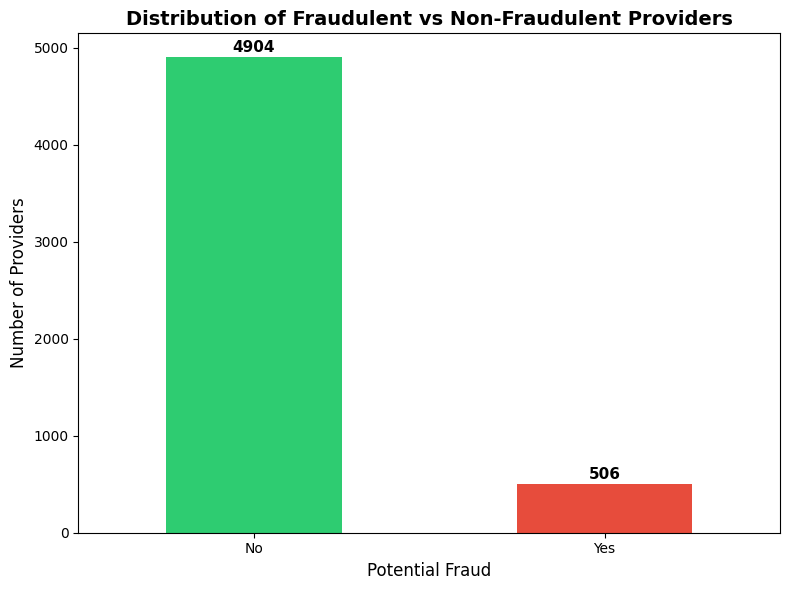


⚠️ IMPORTANT: Data is IMBALANCED
   Non-Fraud: 90.6%
   Fraud: 9.4%


In [ ]:
# Plot fraud distribution
plt.figure(figsize=(8, 6))
colors = ['#2ecc71', '#e74c3c']  # Green for No, Red for Yes
counts = labels['PotentialFraud'].value_counts()
ax = counts.plot(kind='bar', color=colors)

plt.title('Distribution of Fraudulent vs Non-Fraudulent Providers', fontsize=14, fontweight='bold')
plt.xlabel('Potential Fraud', fontsize=12)
plt.ylabel('Number of Providers', fontsize=12)
plt.xticks(rotation=0)

# Add count labels on bars
for i, v in enumerate(counts):
    ax.text(i, v + 50, str(v), ha='center', fontweight='bold', fontsize=11)

plt.tight_layout()
plt.show()

print("\n⚠️ IMPORTANT: Data is IMBALANCED")
print(f"   Non-Fraud: {fraud_pct.iloc[0]:.1f}%")
print(f"   Fraud: {fraud_pct.iloc[1]:.1f}%")

In [ ]:
print("=" * 60)
print("DATA RELATIONSHIPS")
print("=" * 60)

print("\n1. LABELS:")
print(f"   - Unique Providers: {labels['Provider'].nunique()}")

print("\n2. INPATIENT:")
print(f"   - Unique Providers: {inpatient['Provider'].nunique()}")
print(f"   - Unique Patients: {inpatient['BeneID'].nunique()}")
print(f"   - Total Claims: {len(inpatient)}")

print("\n3. OUTPATIENT:")
print(f"   - Unique Providers: {outpatient['Provider'].nunique()}")
print(f"   - Unique Patients: {outpatient['BeneID'].nunique()}")
print(f"   - Total Claims: {len(outpatient)}")

print("\n4. BENEFICIARY:")
print(f"   - Unique Patients: {beneficiary['BeneID'].nunique()}")

print("\n" + "=" * 50)
print("CONNECTION:")
print("Labels → Provider → Claims → BeneID → Beneficiary")
print("=" * 50)

DATA RELATIONSHIPS

1. LABELS:
   - Unique Providers: 5410

2. INPATIENT:
   - Unique Providers: 2092
   - Unique Patients: 31289
   - Total Claims: 40474

3. OUTPATIENT:
   - Unique Providers: 5012
   - Unique Patients: 133980
   - Total Claims: 517737

4. BENEFICIARY:
   - Unique Patients: 138556

CONNECTION:
Labels → Provider → Claims → BeneID → Beneficiary


In [ ]:
# Merge to see patterns
inpatient_labeled = inpatient.merge(labels, on='Provider', how='left')

print("=" * 60)
print("CLAIM ANALYSIS BY FRAUD STATUS")
print("=" * 60)

print("\nInpatient Claim Statistics:")
print(inpatient_labeled.groupby('PotentialFraud')['InscClaimAmtReimbursed'].agg([
    'count', 'mean', 'median', 'std', 'min', 'max'
]))

CLAIM ANALYSIS BY FRAUD STATUS

Inpatient Claim Statistics:
                count          mean  median           std  min     max
PotentialFraud                                                        
No              17072   9782.597821  7000.0   9767.276716    0  125000
Yes             23402  10310.593539  7000.0  10671.735902    0  125000


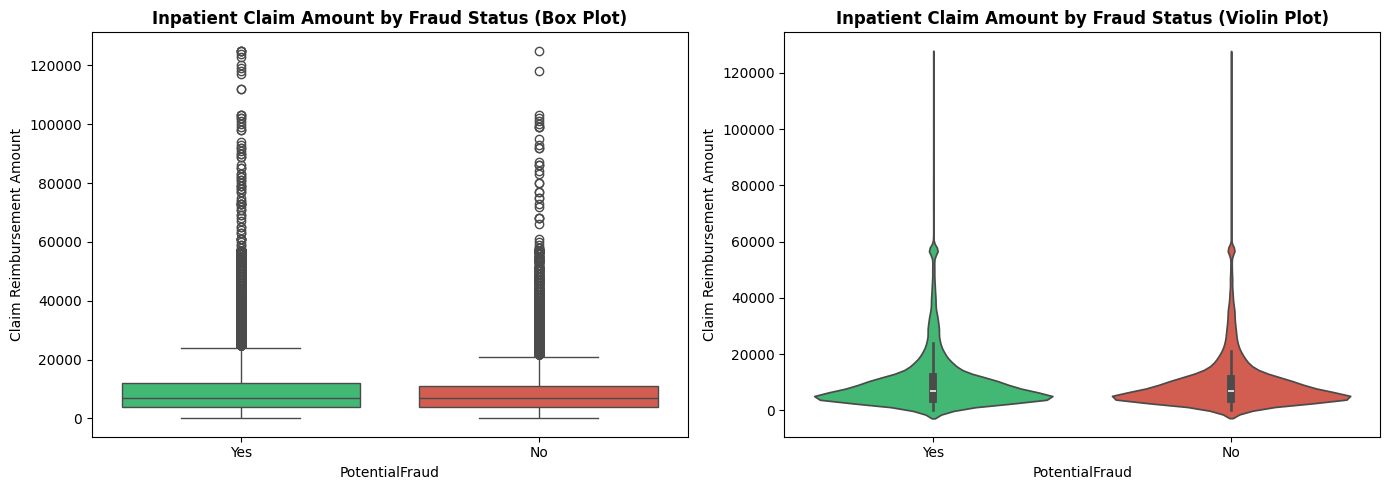

In [ ]:
# Plot claim amounts
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Box plot
sns.boxplot(data=inpatient_labeled, x='PotentialFraud', y='InscClaimAmtReimbursed',
            palette=['#2ecc71', '#e74c3c'], ax=axes[0])
axes[0].set_title('Inpatient Claim Amount by Fraud Status (Box Plot)', fontsize=12, fontweight='bold')
axes[0].set_ylabel('Claim Reimbursement Amount')

# Violin plot
sns.violinplot(data=inpatient_labeled, x='PotentialFraud', y='InscClaimAmtReimbursed',
               palette=['#2ecc71', '#e74c3c'], ax=axes[1])
axes[1].set_title('Inpatient Claim Amount by Fraud Status (Violin Plot)', fontsize=12, fontweight='bold')
axes[1].set_ylabel('Claim Reimbursement Amount')

plt.tight_layout()
plt.show()

In [ ]:
print("=" * 60)
print("FEATURE ENGINEERING - COMBINING CLAIMS")
print("=" * 60)

# Add claim type identifier
inpatient['ClaimType'] = 'Inpatient'
outpatient['ClaimType'] = 'Outpatient'

# Combine all claims
all_claims = pd.concat([inpatient, outpatient], ignore_index=True)

print(f"\n✓ Combined all claims")
print(f"   Total claims: {len(all_claims):,}")
print(f"   Inpatient: {len(inpatient):,}")
print(f"   Outpatient: {len(outpatient):,}")
print(f"   Unique Providers: {all_claims['Provider'].nunique()}")
print(f"   Unique Patients: {all_claims['BeneID'].nunique()}")

FEATURE ENGINEERING - COMBINING CLAIMS

✓ Combined all claims
   Total claims: 558,211
   Inpatient: 40,474
   Outpatient: 517,737
   Unique Providers: 5410
   Unique Patients: 138556


In [ ]:
print("\n=" * 60)
print("CREATING PROVIDER-LEVEL FEATURES")
print("=" * 60)

# Create provider features from claims
provider_features = all_claims.groupby('Provider').agg({
    'ClaimID': 'count',
    'BeneID': 'nunique',
    'InscClaimAmtReimbursed': ['sum', 'mean', 'std', 'max', 'min'],
    'DeductibleAmtPaid': ['sum', 'mean', 'std'],
    'ClaimType': lambda x: (x == 'Inpatient').sum(),
}).reset_index()

# Flatten column names
provider_features.columns = [
    'Provider',
    'TotalClaims',
    'UniquePatients',
    'TotalReimbursed',
    'AvgReimbursed',
    'StdReimbursed',
    'MaxReimbursed',
    'MinReimbursed',
    'TotalDeductible',
    'AvgDeductible',
    'StdDeductible',
    'InpatientClaims'
]

print("✓ Basic provider features created!")
print(f"   Providers: {len(provider_features)}")
print(f"   Features: {len(provider_features.columns) - 1}")


=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
CREATING PROVIDER-LEVEL FEATURES
✓ Basic provider features created!
   Providers: 5410
   Features: 11


In [ ]:
# Add calculated features
provider_features['OutpatientClaims'] = provider_features['TotalClaims'] - provider_features['InpatientClaims']
provider_features['ClaimsPerPatient'] = provider_features['TotalClaims'] / provider_features['UniquePatients']
provider_features['AvgReimbursedPerPatient'] = provider_features['TotalReimbursed'] / provider_features['UniquePatients']
provider_features['AvgDeductiblePerPatient'] = provider_features['TotalDeductible'] / provider_features['UniquePatients']
provider_features['InpatientRatio'] = provider_features['InpatientClaims'] / provider_features['TotalClaims']
provider_features['OutpatientRatio'] = provider_features['OutpatientClaims'] / provider_features['TotalClaims']
provider_features['ReimbursedPerClaim'] = provider_features['TotalReimbursed'] / provider_features['TotalClaims']
provider_features['DeductiblePerClaim'] = provider_features['TotalDeductible'] / provider_features['TotalClaims']

# Replace inf with 0 and fill NaN
provider_features = provider_features.replace([np.inf, -np.inf], 0)
provider_features = provider_features.fillna(0)

print("\n✓ Calculated features added!")
print(f"   Total features now: {len(provider_features.columns) - 1}")
print("\nFirst 5 rows:")
print(provider_features.head())


✓ Calculated features added!
   Total features now: 19

First 5 rows:
   Provider  TotalClaims  UniquePatients  TotalReimbursed  AvgReimbursed  \
0  PRV51001           25              24           104640    4185.600000   
1  PRV51003          132             117           605670    4588.409091   
2  PRV51004          149             138            52170     350.134228   
3  PRV51005         1165             495           280910     241.124464   
4  PRV51007           72              58            33710     468.194444   

   StdReimbursed  MaxReimbursed  MinReimbursed  TotalDeductible  \
0   10796.091144          42000             10           5340.0   
1    7309.794729          57000              0          66286.0   
2     689.963754           3300              0            310.0   
3     491.556392           4080              0           3700.0   
4    1433.769116          10000              0           3264.0   

   AvgDeductible  StdDeductible  InpatientClaims  OutpatientClaims  \

In [ ]:
print("\n=" * 60)
print("CREATING PATIENT-LEVEL FEATURES")
print("=" * 60)

# Merge claims with beneficiary data
claims_with_bene = all_claims.merge(beneficiary, on='BeneID', how='left')

print(f"✓ Merged claims with beneficiary data")
print(f"   Rows: {len(claims_with_bene):,}")


=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
CREATING PATIENT-LEVEL FEATURES
✓ Merged claims with beneficiary data
   Rows: 558,211


In [ ]:
# Get chronic condition columns
chronic_cols = [col for col in beneficiary.columns if 'Chronic' in col]
print(f"\n✓ Found {len(chronic_cols)} chronic condition columns:")
for col in chronic_cols:
    print(f"   - {col}")


✓ Found 11 chronic condition columns:
   - ChronicCond_Alzheimer
   - ChronicCond_Heartfailure
   - ChronicCond_KidneyDisease
   - ChronicCond_Cancer
   - ChronicCond_ObstrPulmonary
   - ChronicCond_Depression
   - ChronicCond_Diabetes
   - ChronicCond_IschemicHeart
   - ChronicCond_Osteoporasis
   - ChronicCond_rheumatoidarthritis
   - ChronicCond_stroke


In [ ]:
# Create patient features per provider
patient_agg_dict = {
    'Age': 'mean',
    'IsDeceased': 'mean',
}

# Add chronic conditions
for col in chronic_cols:
    patient_agg_dict[col] = lambda x: (x == 1).mean()

# Add annual reimbursement amounts
if 'IPAnnualReimbursementAmt' in claims_with_bene.columns:
    patient_agg_dict['IPAnnualReimbursementAmt'] = 'mean'
if 'IPAnnualDeductibleAmt' in claims_with_bene.columns:
    patient_agg_dict['IPAnnualDeductibleAmt'] = 'mean'
if 'OPAnnualReimbursementAmt' in claims_with_bene.columns:
    patient_agg_dict['OPAnnualReimbursementAmt'] = 'mean'
if 'OPAnnualDeductibleAmt' in claims_with_bene.columns:
    patient_agg_dict['OPAnnualDeductibleAmt'] = 'mean'

# Aggregate by provider
patient_features = claims_with_bene.groupby('Provider').agg(patient_agg_dict).reset_index()

# Rename columns for clarity
rename_dict = {
    'Age': 'AvgPatientAge',
    'IsDeceased': 'DeceasedRate',
    'IPAnnualReimbursementAmt': 'AvgIPAnnualReimb',
    'IPAnnualDeductibleAmt': 'AvgIPAnnualDeduct',
    'OPAnnualReimbursementAmt': 'AvgOPAnnualReimb',
    'OPAnnualDeductibleAmt': 'AvgOPAnnualDeduct',
}

for col in chronic_cols:
    rename_dict[col] = col.replace('ChronicCond_', '') + '_Rate'

patient_features = patient_features.rename(columns=rename_dict)

# Fill NaN with 0
patient_features = patient_features.fillna(0)

print(f"\n✓ Patient features created!")
print(f"   Features: {len(patient_features.columns) - 1}")
print("\nFirst 5 rows:")
print(patient_features.head())


✓ Patient features created!
   Features: 17

First 5 rows:
   Provider  AvgPatientAge  DeceasedRate  Alzheimer_Rate  Heartfailure_Rate  \
0  PRV51001      78.280000      0.000000        0.600000           0.760000   
1  PRV51003      69.553030      0.007576        0.424242           0.606061   
2  PRV51004      71.812081      0.006711        0.429530           0.590604   
3  PRV51005      70.000858      0.003433        0.365665           0.583691   
4  PRV51007      68.791667      0.013889        0.361111           0.555556   

   KidneyDisease_Rate  Cancer_Rate  ObstrPulmonary_Rate  Depression_Rate  \
0            0.680000     0.200000             0.400000         0.360000   
1            0.484848     0.075758             0.310606         0.409091   
2            0.335570     0.107383             0.275168         0.422819   
3            0.435193     0.141631             0.253219         0.416309   
4            0.305556     0.166667             0.222222         0.402778   

   Diabe

In [ ]:
print("\n=" * 60)
print("MERGING ALL FEATURES")
print("=" * 60)

# Merge provider and patient features
final_features = provider_features.merge(patient_features, on='Provider', how='left')
final_features = final_features.fillna(0)

print(f"✓ All features merged!")
print(f"   Shape: {final_features.shape}")
print(f"   Features: {len(final_features.columns) - 1}")


=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
MERGING ALL FEATURES
✓ All features merged!
   Shape: (5410, 37)
   Features: 36


In [ ]:
print("\n=" * 60)
print("CREATING FINAL DATASET")
print("=" * 60)

# Merge with labels
final_data = final_features.merge(labels, on='Provider', how='inner')

# Create binary target variable
final_data['Fraud'] = (final_data['PotentialFraud'] == 'Yes').astype(int)

print(f"✓ Final dataset created!")
print(f"   Shape: {final_data.shape}")
print(f"   Providers: {len(final_data)}")

print(f"\nFraud Distribution:")
print(final_data['Fraud'].value_counts())
print(f"\nPercentages:")
print(final_data['Fraud'].value_counts(normalize=True) * 100)


=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
CREATING FINAL DATASET
✓ Final dataset created!
   Shape: (5410, 39)
   Providers: 5410

Fraud Distribution:
Fraud
0    4904
1     506
Name: count, dtype: int64

Percentages:
Fraud
0    90.64695
1     9.35305
Name: proportion, dtype: float64


In [ ]:
print("\n=" * 60)
print("DATA QUALITY CHECK")
print("=" * 60)

# Check for NaN
print(f"NaN values: {final_data.isnull().sum().sum()}")

# Check for infinity
numeric_cols = final_data.select_dtypes(include=[np.number]).columns
inf_count = np.isinf(final_data[numeric_cols]).sum().sum()
print(f"Infinity values: {inf_count}")

# Check fraud distribution
print(f"\nFraud distribution:")
print(f"   Fraud (1): {(final_data['Fraud'] == 1).sum()}")
print(f"   Not Fraud (0): {(final_data['Fraud'] == 0).sum()}")

# Check feature ranges
print(f"\nFeature statistics (sample):")
sample_features = ['TotalClaims', 'AvgReimbursed', 'UniquePatients', 'InpatientRatio']
print(final_data[sample_features].describe())

if inf_count == 0 and final_data.isnull().sum().sum() == 0:
    print("\n✅ DATA QUALITY IS GOOD!")
else:
    print("\n⚠️ WARNING: Data quality issues detected!")


=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
DATA QUALITY CHECK
NaN values: 0
Infinity values: 0

Fraud distribution:
   Fraud (1): 506
   Not Fraud (0): 4904

Feature statistics (sample):
       TotalClaims  AvgReimbursed  UniquePatients  InpatientRatio
count  5410.000000    5410.000000     5410.000000     5410.000000
mean    103.181331    1740.679369       67.153420        0.144568
std     272.456989    3484.473124      142.748729        0.288362
min       1.000000       0.000000        1.000000        0.000000
25%      10.000000     232.394593        8.000000        0.000000
50%      31.000000     356.085106       25.000000        0.000000
75%      87.000000    1490.154301       65.000000        0.128205
max    8240.000000   57000.000000     2857.000000        1.000000

✅ DATA QUALITY IS GOOD!



=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
CREATING VISUALIZATIONS


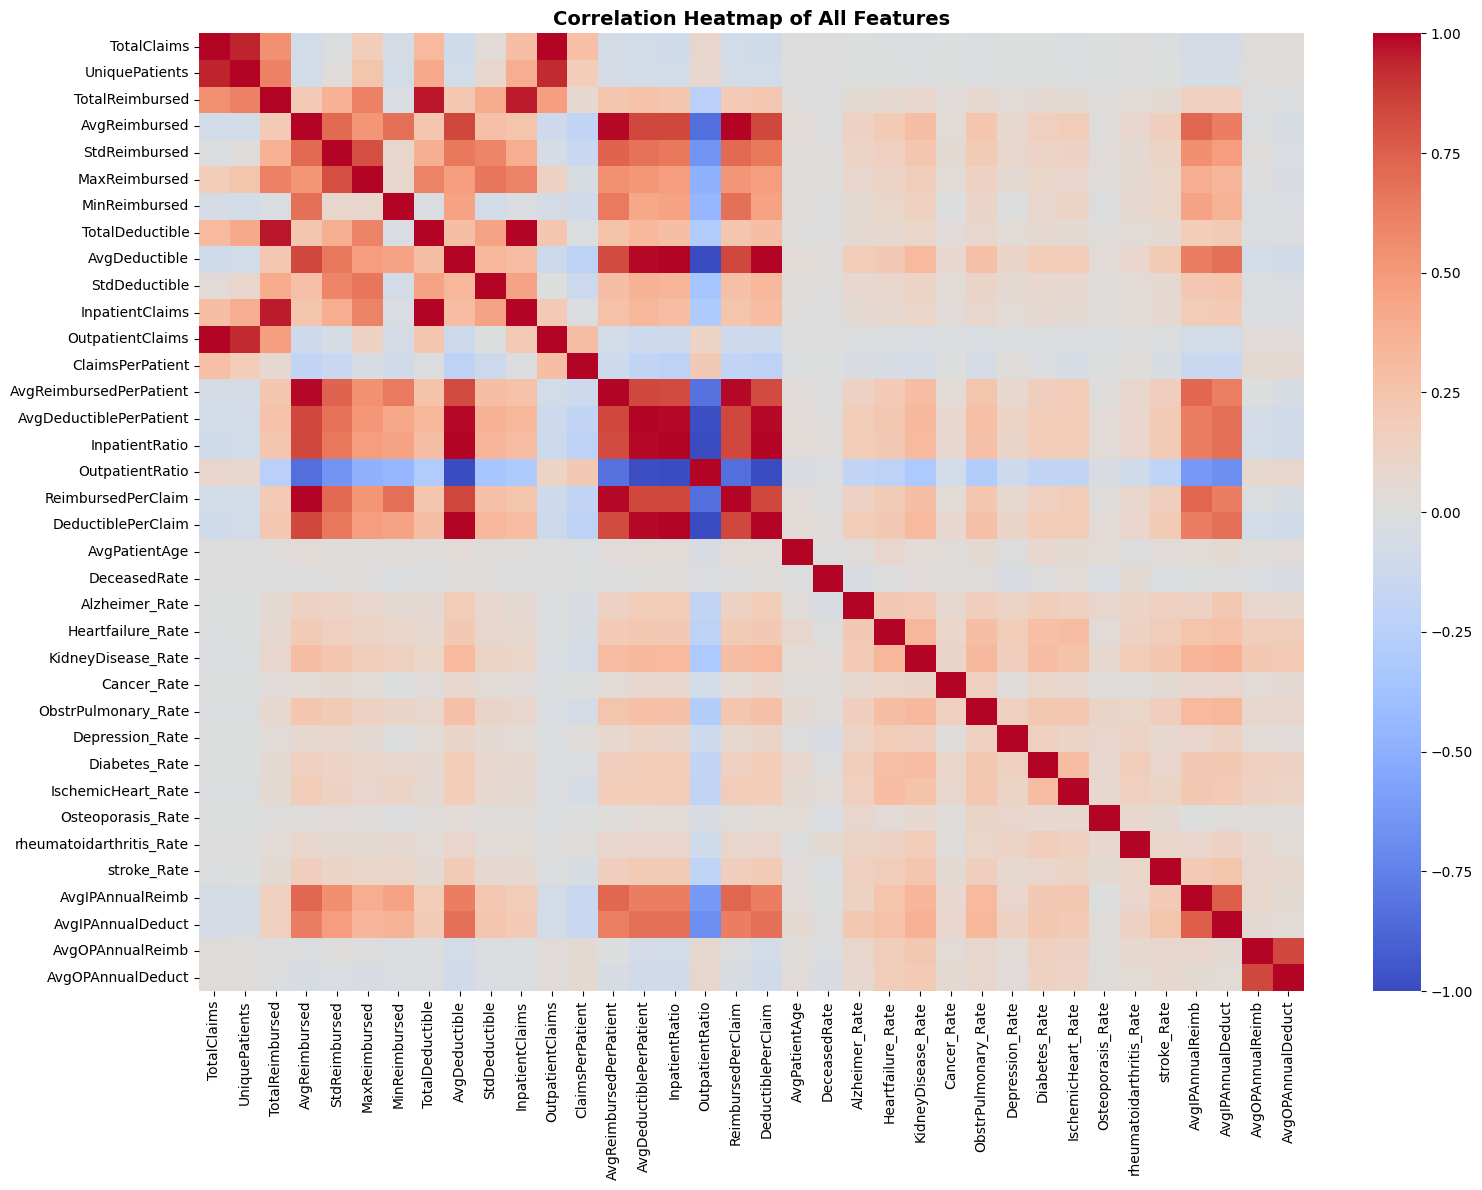

In [ ]:
print("\n=" * 60)
print("CREATING VISUALIZATIONS")
print("=" * 60)

# Correlation heatmap
plt.figure(figsize=(16, 12))
feature_cols = [col for col in final_data.columns if col not in ['Provider', 'PotentialFraud', 'Fraud']]
correlation = final_data[feature_cols].corr()
sns.heatmap(correlation, cmap='coolwarm', center=0, annot=False)
plt.title('Correlation Heatmap of All Features', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

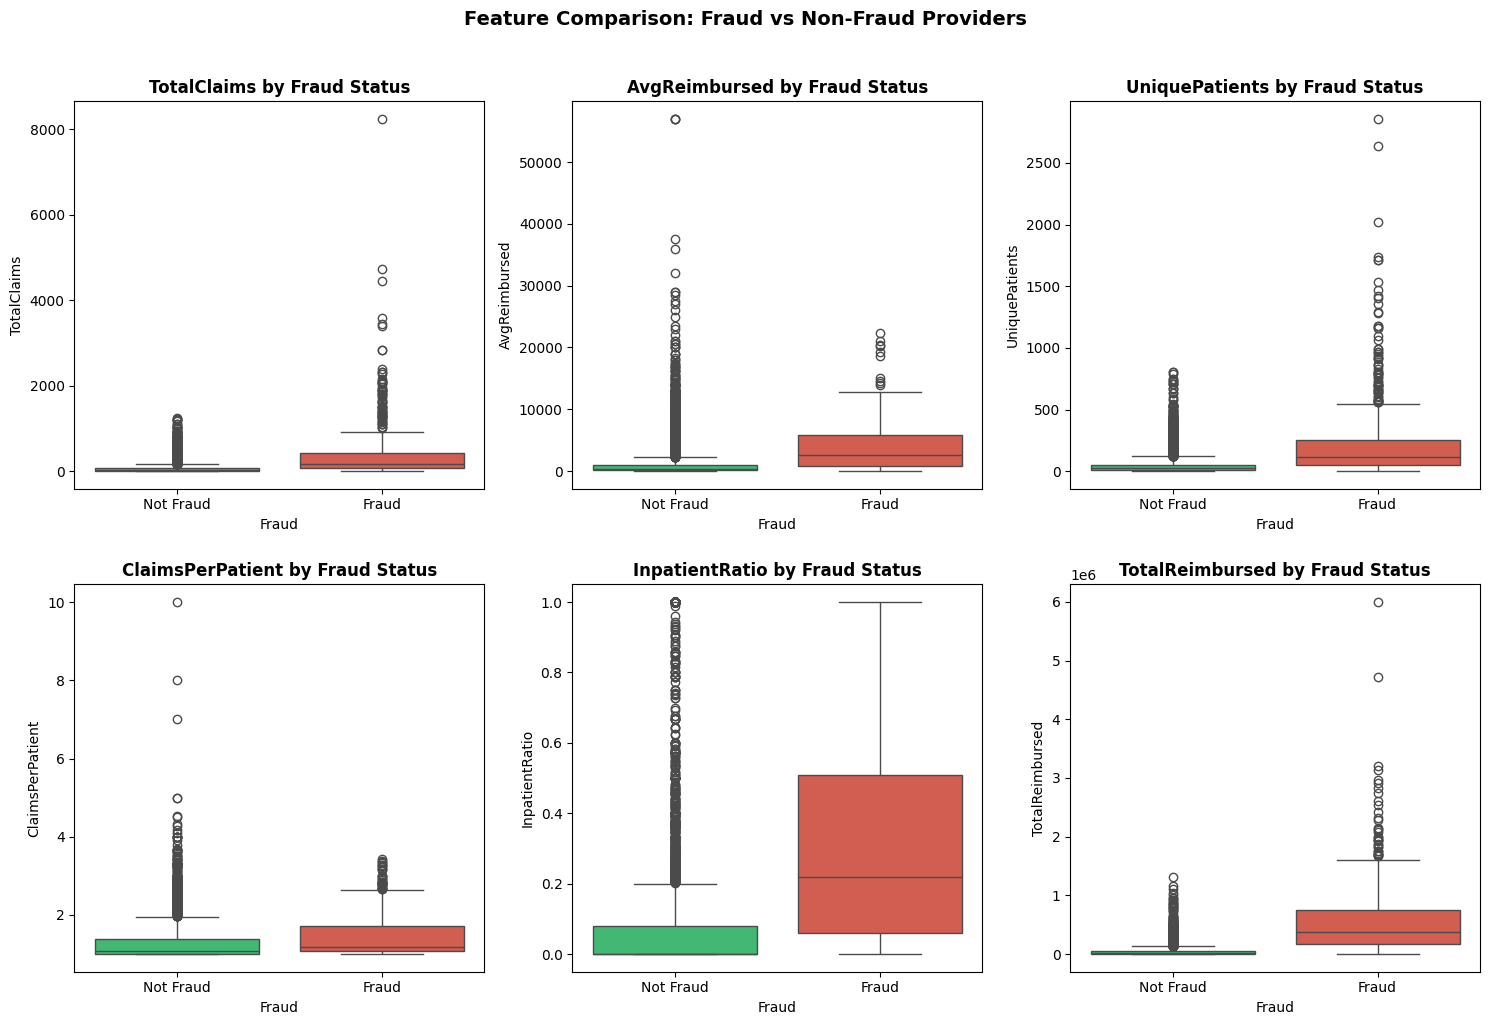

In [ ]:
# Feature comparison by fraud status
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

features_to_plot = ['TotalClaims', 'AvgReimbursed', 'UniquePatients',
                    'ClaimsPerPatient', 'InpatientRatio', 'TotalReimbursed']

for idx, feature in enumerate(features_to_plot):
    row = idx // 3
    col = idx % 3
    sns.boxplot(data=final_data, x='Fraud', y=feature, ax=axes[row, col],
                palette=['#2ecc71', '#e74c3c'])
    axes[row, col].set_title(f'{feature} by Fraud Status', fontweight='bold')
    axes[row, col].set_xticklabels(['Not Fraud', 'Fraud'])

plt.suptitle('Feature Comparison: Fraud vs Non-Fraud Providers', fontsize=14, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

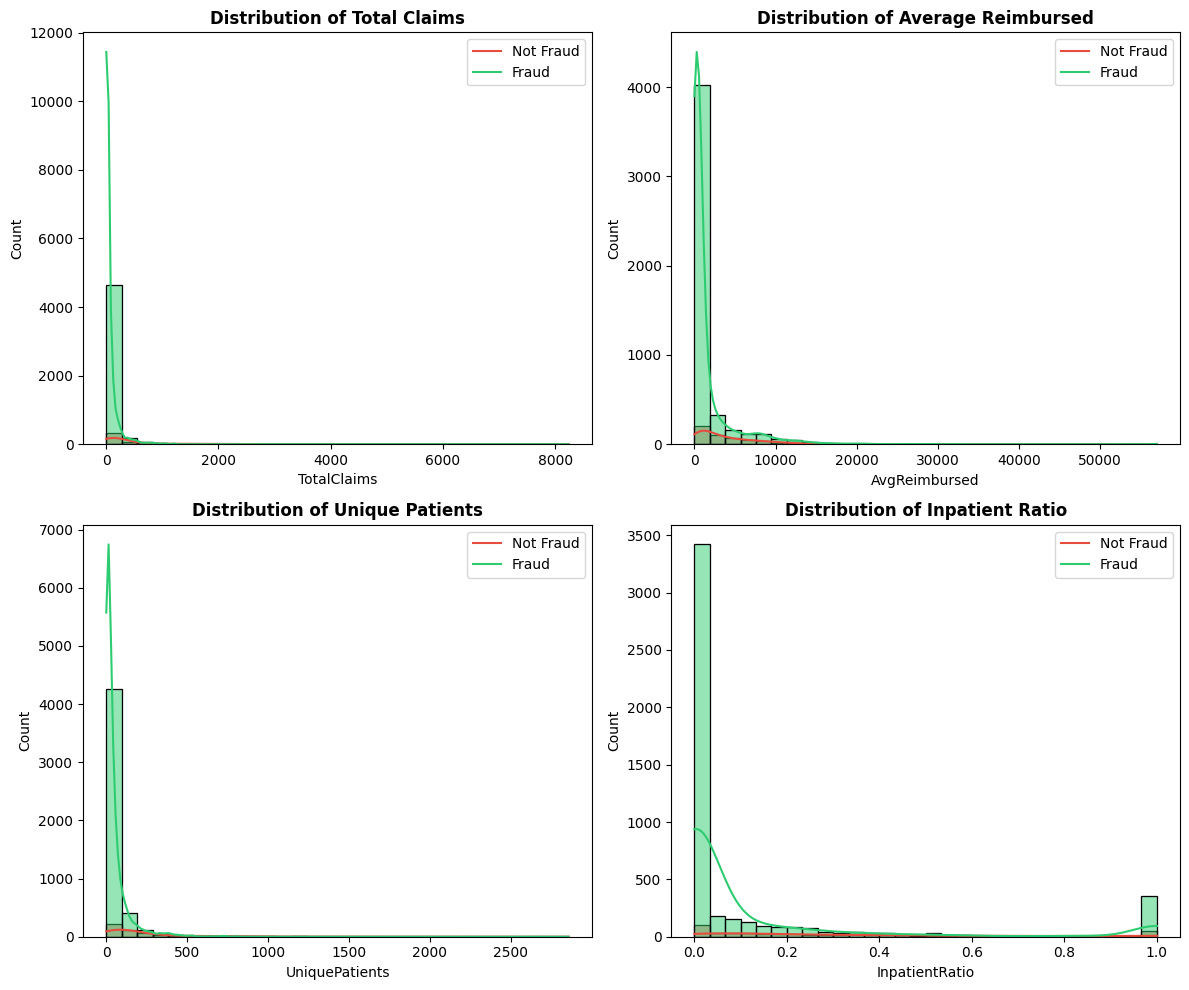

In [ ]:
# Distribution of key features
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Total Claims
sns.histplot(data=final_data, x='TotalClaims', hue='Fraud', ax=axes[0,0],
             kde=True, palette=['#2ecc71', '#e74c3c'], bins=30)
axes[0,0].set_title('Distribution of Total Claims', fontweight='bold')
axes[0,0].legend(labels=['Not Fraud', 'Fraud'])

# Average Reimbursed
sns.histplot(data=final_data, x='AvgReimbursed', hue='Fraud', ax=axes[0,1],
             kde=True, palette=['#2ecc71', '#e74c3c'], bins=30)
axes[0,1].set_title('Distribution of Average Reimbursed', fontweight='bold')
axes[0,1].legend(labels=['Not Fraud', 'Fraud'])

# Unique Patients
sns.histplot(data=final_data, x='UniquePatients', hue='Fraud', ax=axes[1,0],
             kde=True, palette=['#2ecc71', '#e74c3c'], bins=30)
axes[1,0].set_title('Distribution of Unique Patients', fontweight='bold')
axes[1,0].legend(labels=['Not Fraud', 'Fraud'])

# Inpatient Ratio
sns.histplot(data=final_data, x='InpatientRatio', hue='Fraud', ax=axes[1,1],
             kde=True, palette=['#2ecc71', '#e74c3c'], bins=30)
axes[1,1].set_title('Distribution of Inpatient Ratio', fontweight='bold')
axes[1,1].legend(labels=['Not Fraud', 'Fraud'])

plt.tight_layout()
plt.show()

In [ ]:
print("\n=" * 60)
print("SAVING PROCESSED DATA")
print("=" * 60)

# Save final dataset
final_data.to_csv('train_processed.csv', index=False)

print("✓ File saved: train_processed.csv")
print(f"   Shape: {final_data.shape}")
print(f"   Size: {final_data.memory_usage(deep=True).sum() / 1024**2:.2f} MB")


=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
SAVING PROCESSED DATA
✓ File saved: train_processed.csv
   Shape: (5410, 39)
   Size: 2.08 MB


In [ ]:
print("\n=" * 60)
print("FEATURE LIST (For Documentation)")
print("=" * 60)

feature_cols = [col for col in final_data.columns if col not in ['Provider', 'PotentialFraud', 'Fraud']]

print(f"\nTotal Features: {len(feature_cols)}\n")

for i, col in enumerate(feature_cols, 1):
    print(f"{i:3}. {col}")


=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
FEATURE LIST (For Documentation)

Total Features: 36

  1. TotalClaims
  2. UniquePatients
  3. TotalReimbursed
  4. AvgReimbursed
  5. StdReimbursed
  6. MaxReimbursed
  7. MinReimbursed
  8. TotalDeductible
  9. AvgDeductible
 10. StdDeductible
 11. InpatientClaims
 12. OutpatientClaims
 13. ClaimsPerPatient
 14. AvgReimbursedPerPatient
 15. AvgDeductiblePerPatient
 16. InpatientRatio
 17. OutpatientRatio
 18. ReimbursedPerClaim
 19. DeductiblePerClaim
 20. AvgPatientAge
 21. DeceasedRate
 22. Alzheimer_Rate
 23. Heartfailure_Rate
 24. KidneyDisease_Rate
 25. Cancer_Rate
 26. ObstrPulmonary_Rate
 27. Depression_Rate
 28. Diabetes_Rate
 29. IschemicHeart_Rate
 30. Osteoporasis_Rate
 31. rheumatoidarthritis_Rate
 32. stroke_Rate
 33. AvgIPAnnualReimb
 34. AvgIPAnnualDeduct
 35. AvgOPAnnualReimb
 36. AvgOPAnnualDeduct
